In [65]:
# Workflow
# Example of a torch project

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1: Data (how to prepare and load data)
# Get data in numerical representation (into tensors)


# 2: Build the model

device(type='cuda')

In [66]:
X = torch.arange(0, 30)
Y = torch.arange(30, 60)
# Y = a + bX -> a = 30 and b = 1 linear regression

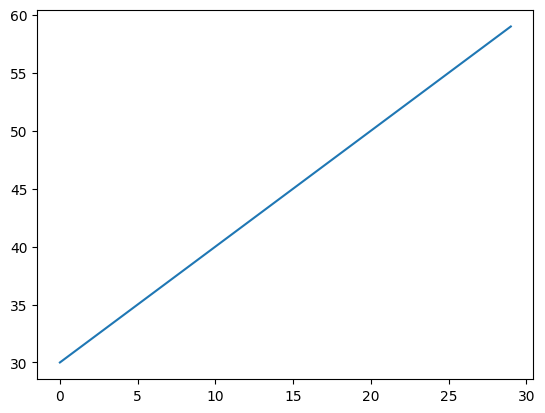

In [67]:
plt.plot(X, Y)

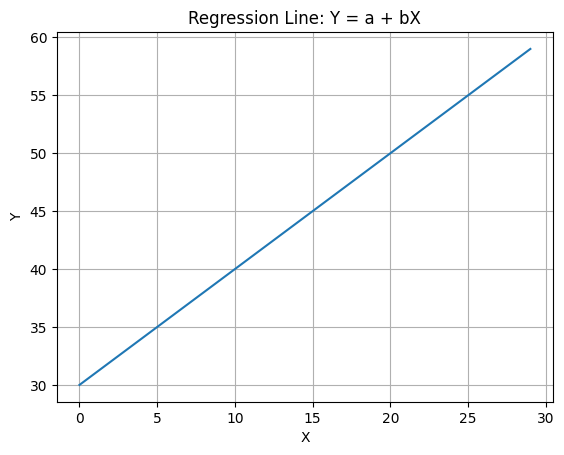

In [68]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [69]:
weight = 1
bias = 30

X = torch.arange(0, 30).unsqueeze(dim=1)
X

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29]])

In [70]:
Y = weight * X + bias
Y

tensor([[30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59]])

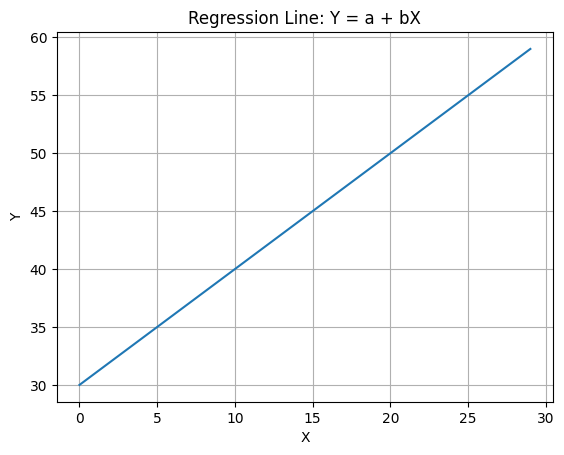

In [71]:
fig, ax = plt.subplots()
ax.plot(X.squeeze(), Y.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [72]:
# Splitting data training set, validation set, test set
weight = 1
bias = 30
SAMPLES = 1000

X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

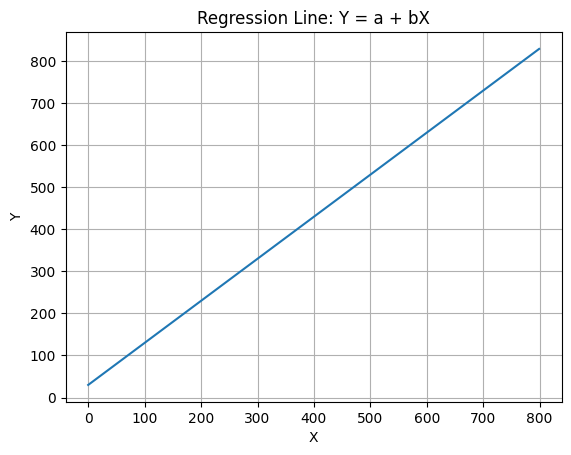

In [73]:
fig, ax = plt.subplots()
ax.plot(X_train.squeeze(), Y_train.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [74]:
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

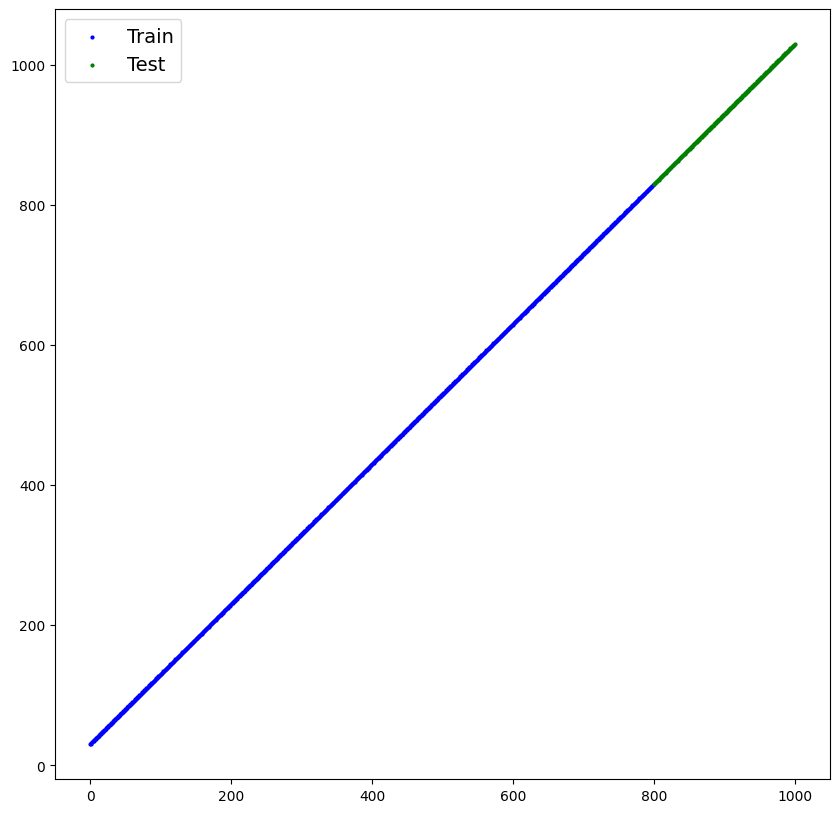

In [75]:
pp(X_train, Y_train, X_test, Y_test)

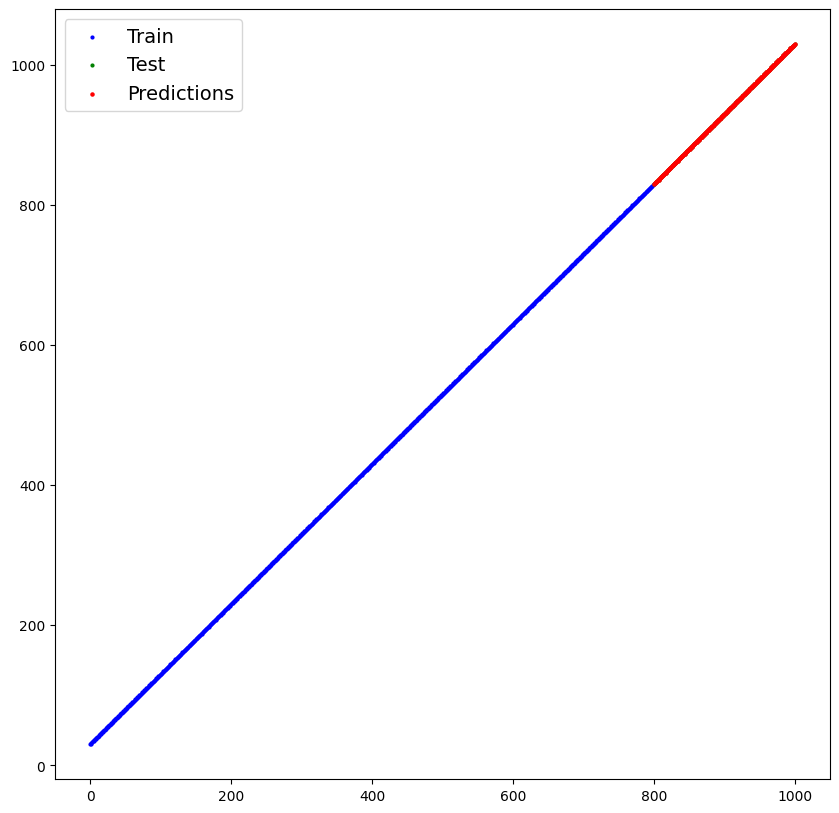

In [76]:

pp(X_train, Y_train, X_test, Y_test, Y_test)

In [77]:
# Splitting data training set, validation set, test set
weight = 1
bias = 30
SAMPLES = 1000

X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [81]:
# Now lets create the predictions
# Create the model with linear regression
class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
    def __init__(self):
        super().__init__()
        # This are the parameters that the model wants to learn
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # Forward functions define the computations of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# The goal of the model is to predict the correct weight and bias
# Il will adjust the weight and bias to get it correct
# With liear is using gradient decent to get to the ideal values

In [82]:
# !! Now we need to train the model with the data !!
# l_model = LinearRegressionModel()

#predictions = l_model.forward(X_train)
# Print
# pp(X_train, Y_train, X_test, Y_test, predictions)


In [91]:
# We want to know wat is insede the module
torch.manual_seed(432)

# Create an instance of the class
model = LinearRegressionModel()
params = list(model.parameters())
print(params)
(model.state_dict())

[Parameter containing:
tensor([-0.0796], requires_grad=True), Parameter containing:
tensor([-0.2294], requires_grad=True)]


OrderedDict([('weight', tensor([-0.0796])), ('bias', tensor([-0.2294]))])

In [92]:
# What we want is that model.state_dict() is as close as possible as a and b of Y = a + bX

In [93]:
# Without training we can try to predict Y_test

# Inference (making a prediction !)

In [94]:
with torch.inference_mode():
    predictions = model(X_test)

In [96]:
print(predictions[10: 20])

tensor([[-64.6998],
        [-64.7794],
        [-64.8589],
        [-64.9385],
        [-65.0181],
        [-65.0977],
        [-65.1773],
        [-65.2569],
        [-65.3365],
        [-65.4161]])


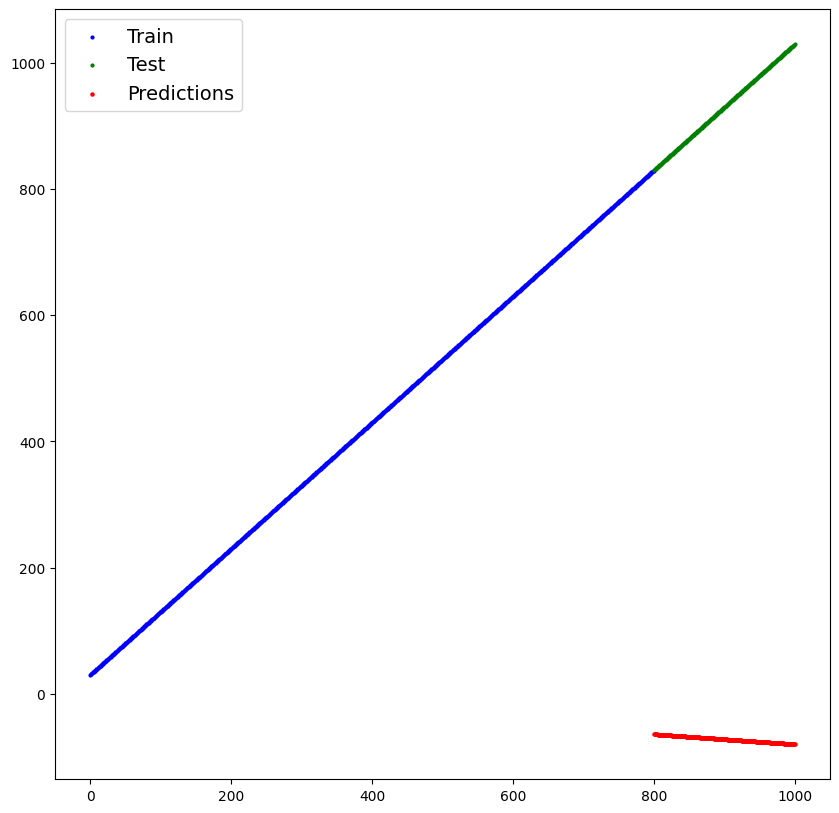

In [97]:
pp(X_train, Y_train, X_test, Y_test, predictions)

In [102]:
# This graph is not good, as we can see the prediction is random

# We can mesure the model goodness using a loss function
lossf = nn.L1Loss()
output = lossf(predictions, Y_test)
print(f"Loss: {output}")

# print(f"LossBack: {output.backward()}")

Loss: 1001.3233642578125


# Training (lets make it learn from data)

In [ ]:
# The optimizer will use a loss functino to understand how faroff of the goal it will be
# The optimizer will modify the parameters to lower the loss 

# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.01 # learning rate, a metaparameter
) 

# Optimizers and losses will come with experience

# Training loop and Testing loop
# 0. loop through the data
# 1. forward pass (data moving through the graph, make predictions)
# 2. Calculate the loss
# 3. Loss backward - move from the output to input to calculate gradients of the module
# 4. Optimization step:  gradient decent modify the weights
#   - this will adjust the parameters to reduce the loss

In [114]:
# Training
model = LinearRegressionModel()
print(list(model.parameters()))
# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.01 # learning rate, a metaparameter
)

epochs = 10 # Hyperparameter to know how many loops
for epoch in range(epochs):
    # Set to training mode (for this we need grad=True)
    model.train() # Set the model to allow for gradient decent

    # Farward pass
    new_y_pred = model(X_train)

    # Calculate Loss (pred, real)
    loss = loss_func(new_y_pred, Y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimize
    optimizer.step()

    # Testing
    model.eval()



[Parameter containing:
tensor([0.4706], requires_grad=True), Parameter containing:
tensor([2.2962], requires_grad=True)]


[Parameter containing:
tensor([0.4741], requires_grad=True), Parameter containing:
tensor([2.2972], requires_grad=True)]


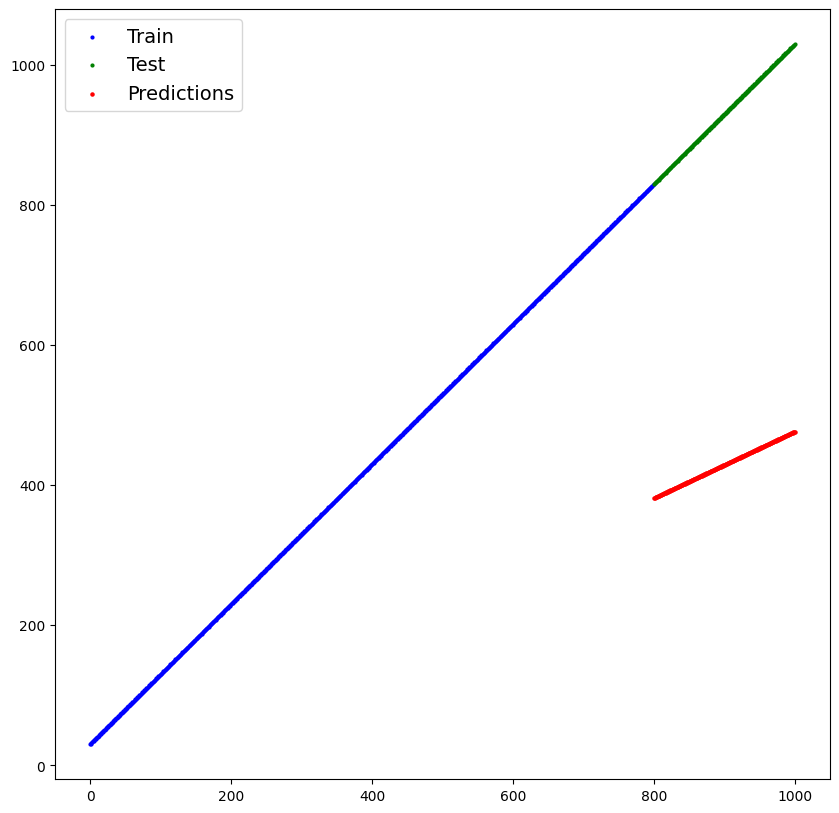

In [115]:
# Lets see
print(list(model.parameters()))
with torch.inference_mode():
    predictions = model(X_test)
pp(X_train, Y_train, X_test, Y_test, predictions)